In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data  = pd.read_csv("iris.csv") # Read the data
print(type(data)) # Type of data
print(data.shape) # Shape of data

<class 'pandas.core.frame.DataFrame'>
(150, 5)


In [3]:
print(data.columns) # Print the name of the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
print(data.head(5)) # Print the first 5 entries

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
data["species"].value_counts() # No of entries per species

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

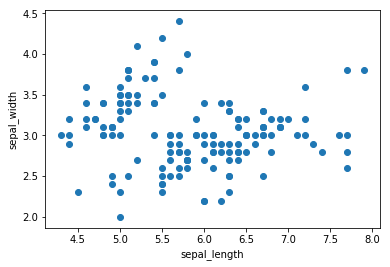

In [6]:
plt.scatter(x = data["sepal_length"], y = data["sepal_width"]) # Scatter plot
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


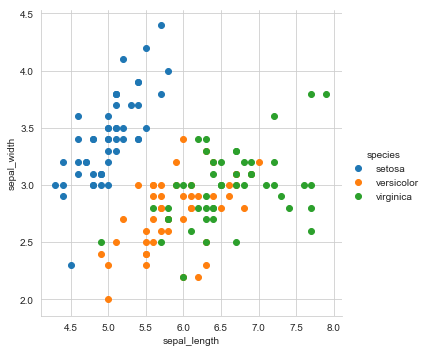

In [7]:
sb.set_style('whitegrid')
sb.FacetGrid(data, hue="species", size=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend() # Scatter plot using Seaborn
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


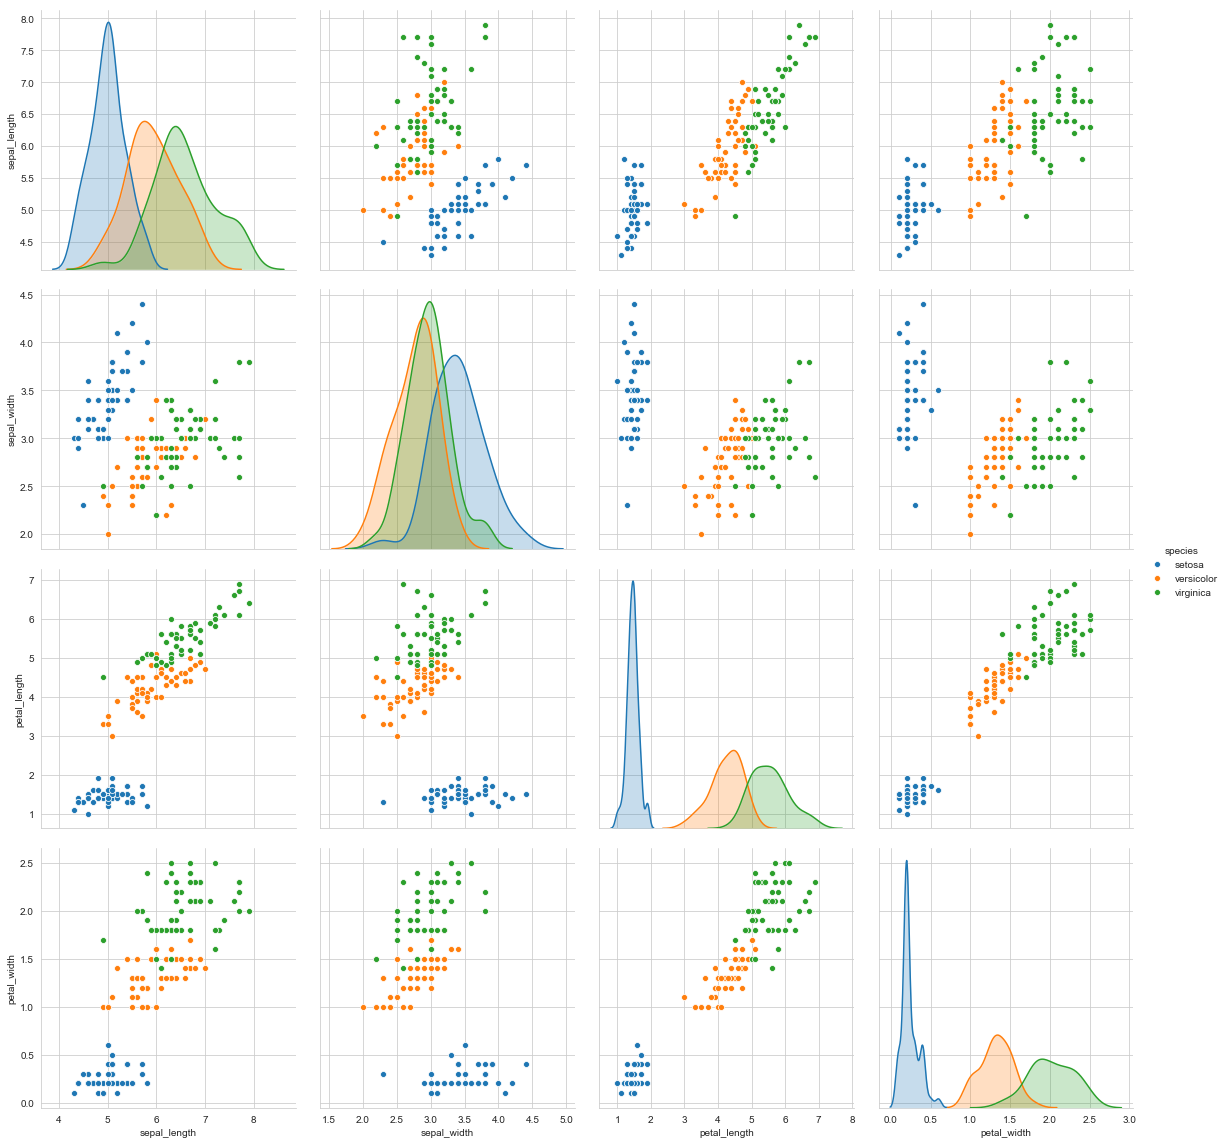

In [8]:
sb.pairplot(data, hue="species", size=4) 
plt.show()

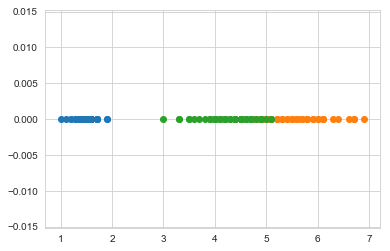

In [9]:
iris_setosa = data.loc[data["species"] == "setosa"]
iris_virginica = data.loc[data["species"] == "virginica"]
iris_versicolor = data.loc[data["species"] == "versicolor"]
plt.scatter(iris_setosa["petal_length"], np.zeros(iris_setosa["petal_length"].shape[0]))
plt.scatter(iris_virginica["petal_length"], np.zeros(iris_virginica["petal_length"].shape[0]))
plt.scatter(iris_versicolor["petal_length"], np.zeros(iris_versicolor["petal_length"].shape[0]))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


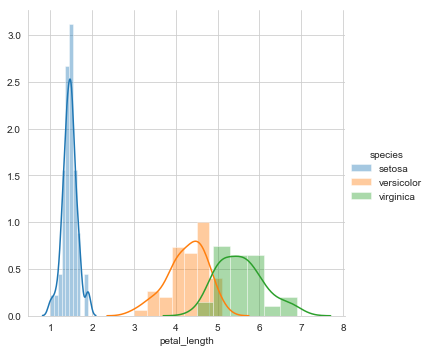

In [10]:
sb.FacetGrid(data, hue="species", size=5).map(sb.distplot, "petal_length").add_legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


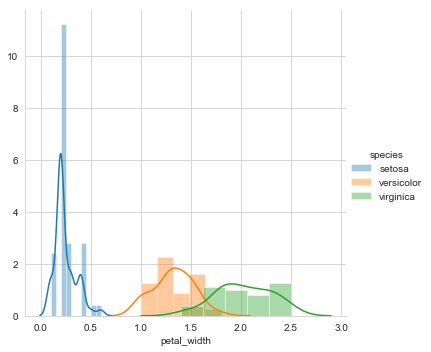

In [11]:
sb.FacetGrid(data, hue="species", size=5).map(sb.distplot, "petal_width").add_legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


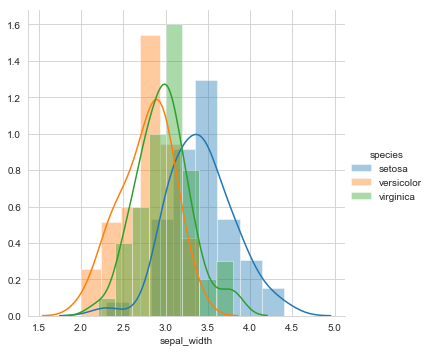

In [12]:
sb.FacetGrid(data, hue="species", size=5).map(sb.distplot, "sepal_width").add_legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


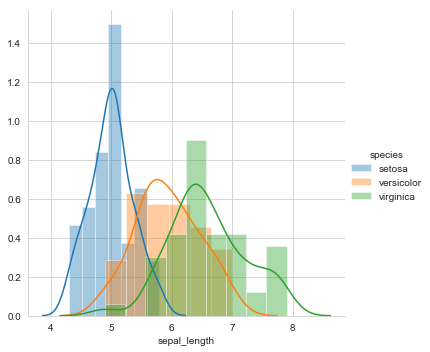

In [13]:
sb.FacetGrid(data, hue="species", size=5).map(sb.distplot, "sepal_length").add_legend()
plt.show()

In [14]:
# Mean of petal lengths of every species
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))

1.464
4.26
5.552


In [15]:
# Standard Deviation of petal lengths of every species
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))
print(np.std(iris_virginica["petal_length"]))

0.17176728442867115
0.4651881339845204
0.5463478745268441


# Medians


In [16]:
print(np.median(iris_setosa["petal_length"])) # Without Outlier
print(np.median(np.append(iris_setosa["petal_length"], 60))) # With Outlier
print(np.median(iris_versicolor["petal_length"]))
print(np.median(iris_virginica["petal_length"]))

1.5
1.5
4.35
5.55


# Percentiles And Quantiles

In [17]:
print("Quantiles")
print(np.percentile(iris_setosa["petal_length"], np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"], np.arange(0, 100, 25)))

Quantiles
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]


In [18]:
print("90th Percentile")
print(np.percentile(iris_setosa["petal_length"], 90))
print(np.percentile(iris_versicolor["petal_length"], 90))
print(np.percentile(iris_virginica["petal_length"], 90))

90th Percentile
1.7
4.8
6.3100000000000005


# Median Absolute Deviation

In [19]:
from statsmodels import robust

In [20]:
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))

0.14826022185056031
0.5189107764769602
0.6671709983275211


# Box Plots

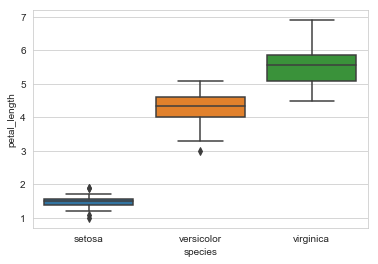

In [21]:
sb.boxplot(x='species', y='petal_length', data=data)
plt.show()

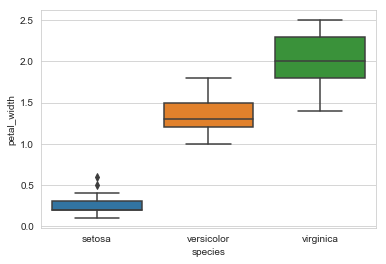

In [22]:
sb.boxplot(x='species', y='petal_width', data=data)
plt.show()

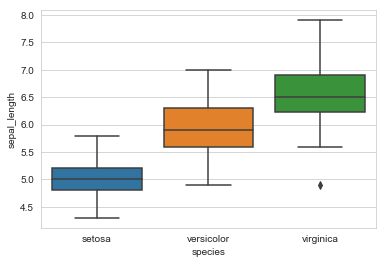

In [23]:
sb.boxplot(x='species', y='sepal_length', data=data)
plt.show()

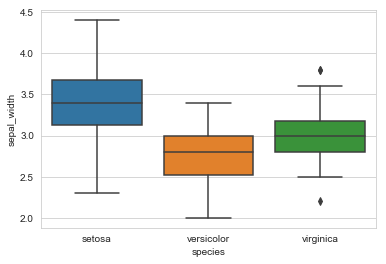

In [24]:
sb.boxplot(x='species', y='sepal_width', data=data)
plt.show()

# Violin Plots

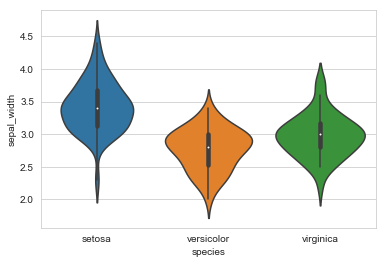

In [26]:
sb.violinplot(x='species', y='sepal_width', data=data)
plt.show()

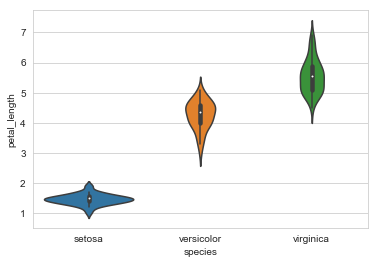

In [27]:
sb.violinplot(x='species', y='petal_length', data=data)
plt.show()

# Multivariate Probability Density, Contour Plots

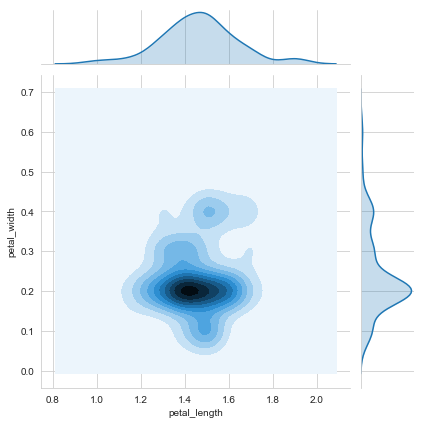

In [33]:
sb.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde")
plt.show()